x = 1:
  Exact factorial   = 1
  Stirling approx.  = 0.9997110732436776
  Relative error    = -0.028893%

x = 2:
  Exact factorial   = 2
  Stirling approx.  = 1.999985483711709
  Relative error    = -0.000726%

x = 3:
  Exact factorial   = 6
  Stirling approx.  = 5.999998563795036
  Relative error    = -0.000024%

x = 4:
  Exact factorial   = 24
  Stirling approx.  = 24.000003472778577
  Relative error    = 0.000014%

x = 5:
  Exact factorial   = 120
  Stirling approx.  = 120.00001405731778
  Relative error    = 0.000012%

x = 6:
  Exact factorial   = 720
  Stirling approx.  = 720.0000545380988
  Relative error    = 0.000008%

x = 7:
  Exact factorial   = 5040
  Stirling approx.  = 5040.000244234555
  Relative error    = 0.000005%

x = 8:
  Exact factorial   = 40320
  Stirling approx.  = 40320.00128125924
  Relative error    = 0.000003%

x = 9:
  Exact factorial   = 362880
  Stirling approx.  = 362880.00779802125
  Relative error    = 0.000002%

x = 10:
  Exact factorial   = 3628800
  

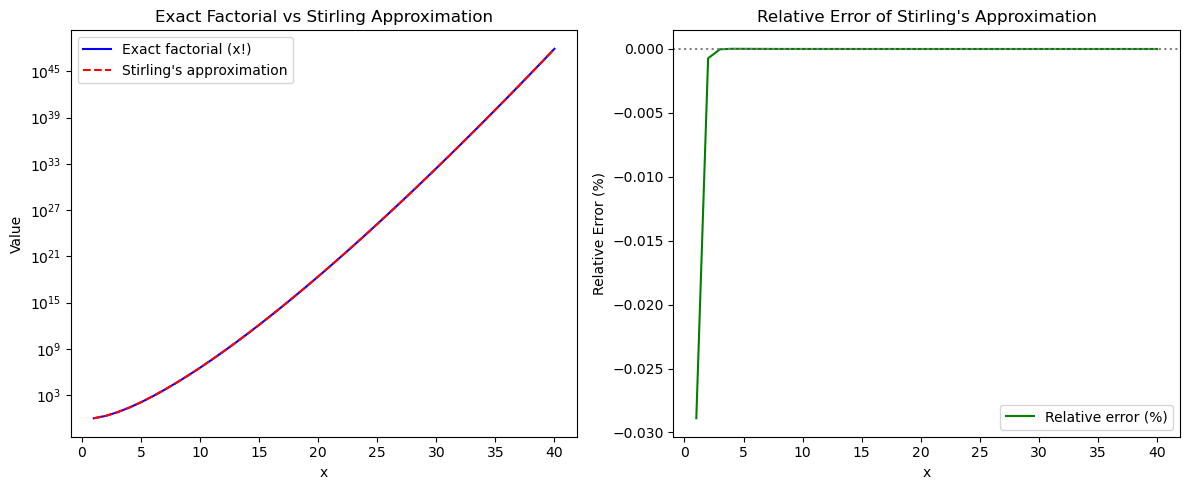

In [3]:
import math
import matplotlib.pyplot as plt

def stirling_approximation_with_correction(x: int) -> float:
    """
    Computes the Stirling approximation with correction terms for a given integer x.
    Formula:
        x! ≈ sqrt(2πx) * (x/e)^x * (1 + 1/(12x) + 1/(288x^2) - 139/(51840x^3))
    """
    pi = math.pi
    e = math.e
    sqrt_term = math.sqrt(2 * pi * x)
    main_term = (x / e) ** x
    correction_term = 1 + 1 / (12 * x) + 1 / (288 * x**2) - 139 / (51840 * x**3)
    approximation = sqrt_term * main_term * correction_term

    return approximation
    
def compute_and_plot_stirling_vs_factorial(max_x: int = 40):
    """
    Computes exact factorials and Stirling approximations for x in [1, max_x],
    plots both the values and the relative error.
    Also prints intermediate terms and exact values for comparison.
    """
    x_values = list(range(1, max_x + 1))
    exact_factorials = []
    stirling_estimates = []
    relative_errors = []

    for x in x_values:
        exact = math.factorial(x)
        approx = stirling_approximation_with_correction(x)
        error = (approx / exact - 1) * 100

        # Store for plotting
        exact_factorials.append(exact)
        stirling_estimates.append(approx)
        relative_errors.append(error)

        # Print detailed comparison
        print(f"x = {x}:")
        print(f"  Exact factorial   = {exact}")
        print(f"  Stirling approx.  = {approx}")
        print(f"  Relative error    = {error:.6f}%\n")

    # Plotting
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, exact_factorials, label='Exact factorial (x!)', color='blue')
    plt.plot(x_values, stirling_estimates, label="Stirling's approximation", color='red', linestyle='dashed')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.title('Exact Factorial vs Stirling Approximation')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_values, relative_errors, label='Relative error (%)', color='green')
    plt.axhline(0, color='gray', linestyle='dotted')
    plt.xlabel('x')
    plt.ylabel('Relative Error (%)')
    plt.title("Relative Error of Stirling's Approximation")
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    compute_and_plot_stirling_vs_factorial(max_x=40)